In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
#print(df.head)
# remove null rows
#df.dropna(inplace=True)
#print(df.isnull().sum())
#print(df.shape)

In [2]:
# preprocessing
print(df.isnull().sum())

PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
numPeriodsPulses             0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 753, dtype: int64


In [3]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
# select best k features

X = df.drop(columns = 'class').values
y = df['class']

SelectKBest(mutual_info_classif, k=5).fit_transform(X, y)

array([[ 2.4874000e+00,  1.6392000e-02,  1.0807000e-01, -3.1901752e+03,
         5.9000000e-05],
       [ 2.8986000e+00,  1.4222000e-02,  9.8360000e-02, -3.1064317e+03,
         1.6900000e-04],
       [ 3.2208000e+00,  3.9709000e-02,  1.0691000e-01, -3.0825691e+03,
         2.1000000e-05],
       ...,
       [-1.1373000e+00,  6.2920000e-03,  1.1600000e-04, -2.0225234e+03,
         1.0128000e-02],
       [-1.7925000e-01,  1.0716000e-02,  9.6500000e-04, -2.0205983e+03,
         5.4840000e-03],
       [ 7.1315000e-01,  8.1830000e-03,  9.5000000e-04, -2.0394590e+03,
         4.6570000e-03]])

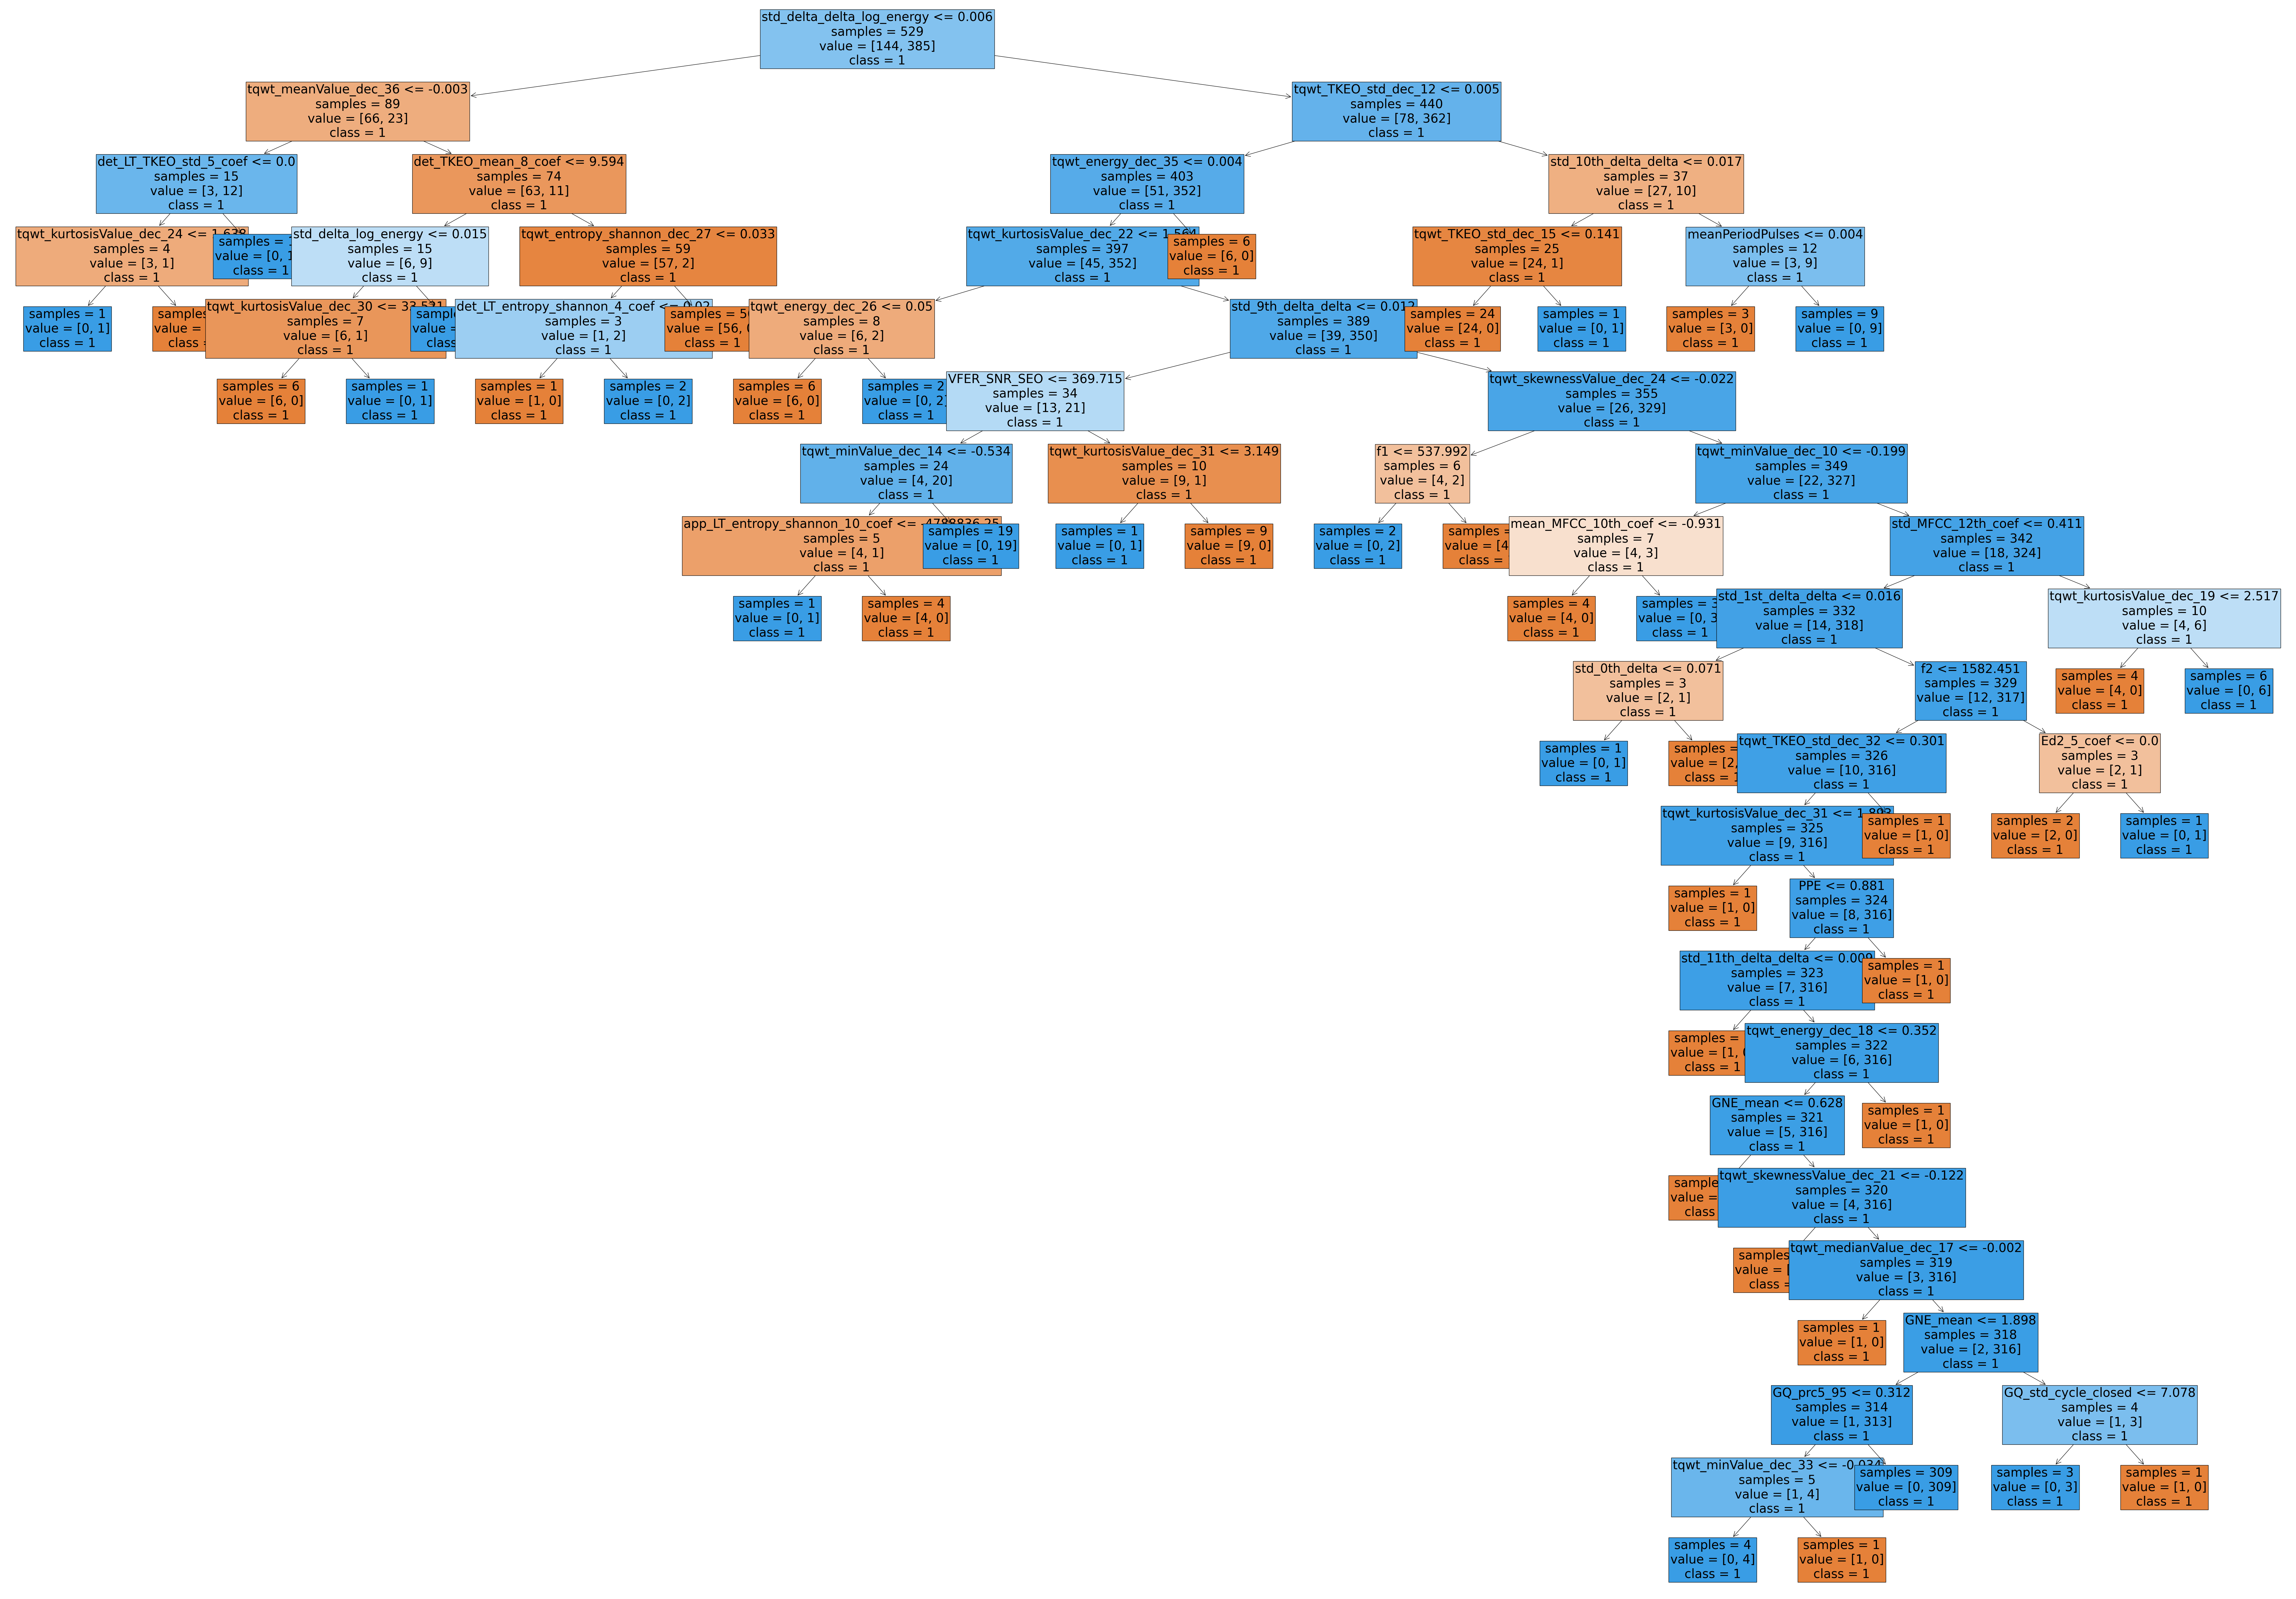

In [4]:
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split


# X_train -> y_train
# X_test -> y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# learn classifier
predictor = tree.DecisionTreeClassifier()
predictor.fit(X_train, y_train)

# plot classifier TODO get feature names
figure = plt.figure(figsize=(100, 70))
tree.plot_tree(predictor, feature_names=df.columns, class_names=df['class'], impurity=False, filled = True, fontsize=30)
plt.show()


In [5]:
# test classifier
y_pred = predictor.predict(X_test)
#print(y_pred.__len__(), y_test.__len__(), y_train.__len__())
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2) * 100, '%')

y_pred = predictor.predict(X_train)
print("accuracy on training set:",  round(metrics.accuracy_score(y_train, y_pred),2) * 100, '%')



accuracy on testing set: 76.0 %
accuracy on training set: 100.0 %


In [6]:
# now while changing kbest features
k = [5,10,40,100,250,700]
acc_testing = []
acc_training = []
for i in k:
    SelectKBest(mutual_info_classif, k=i).fit_transform(X, y)

    # X_train -> y_train
    # X_test -> y_test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

    # learn classifier
    predictor = tree.DecisionTreeClassifier()
    predictor.fit(X_train, y_train)

    # test classifier
    print('nº of features:', i)

    y_pred = predictor.predict(X_test)
    accuracy = round(metrics.accuracy_score(y_test, y_pred),2)
    print("accuracy on testing set:", accuracy * 100, '%')
    acc_testing.append(accuracy)

    y_pred = predictor.predict(X_train)
    accuracy = round(metrics.accuracy_score(y_train, y_pred),2)
    print("accuracy on training set:", accuracy * 100, '%')
    acc_training.append(accuracy)

    print('------------')
    

nº of features: 5
accuracy on testing set: 81.0 %
accuracy on training set: 100.0 %
------------
nº of features: 10
accuracy on testing set: 75.0 %
accuracy on training set: 100.0 %
------------
nº of features: 40
accuracy on testing set: 71.0 %
accuracy on training set: 100.0 %
------------
nº of features: 100
accuracy on testing set: 74.0 %
accuracy on training set: 100.0 %
------------
nº of features: 250
accuracy on testing set: 75.0 %
accuracy on training set: 100.0 %
------------
nº of features: 700
accuracy on testing set: 78.0 %
accuracy on training set: 100.0 %
------------


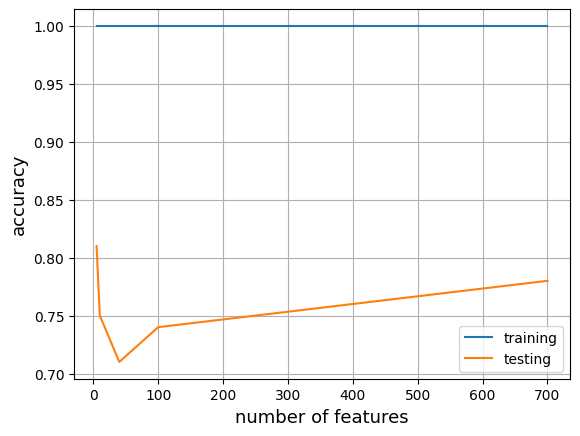

In [7]:
plt.plot(k, acc_training, label = 'training')
plt.plot(k, acc_testing, label = 'testing')
plt.xlabel("number of features",fontsize='13')
plt.ylabel("accuracy",fontsize='13')
plt.legend()
plt.grid()
plt.show()
